In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

Look at the data

In [3]:
print(train_df.columns.values)
train_df.head(10)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Categorical features: Sex,Pclass,Survived,Embarked

Continunous:Age,Fare

Numerical: SibSp, Parch



In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What to drop

- Drop cabin as its is very incomplete

- Drop PassengerId as it isn't useful

- Drop ticket as it is often duplicated

### What to change

- Categorize the ages into different ranges

- Categorize the fare ranges

In [5]:
train_df = train_df.drop(['Ticket','Cabin','Name','PassengerId'],axis=1)
test_df = test_df.drop(['Ticket','Cabin','Name','PassengerId'],axis=1)

### Analyze correlations between features

In [6]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [7]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [8]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived')

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


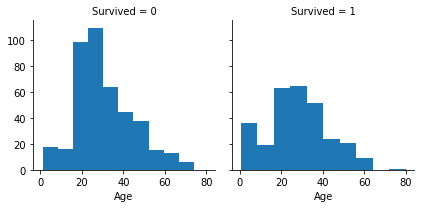

In [9]:
f = sns.FacetGrid(train_df, col='Survived')
f.map(plt.hist, 'Age')

C:\Users\Andrew\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


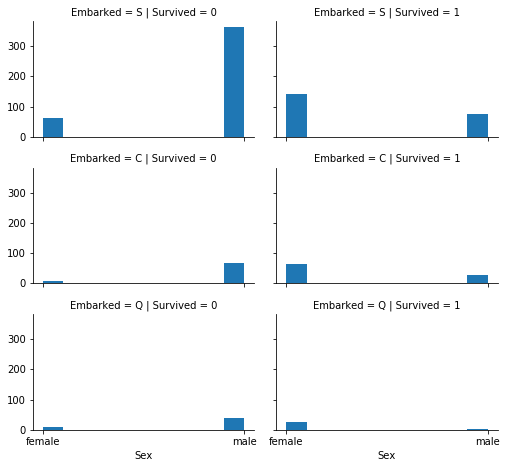

In [10]:
f = sns.FacetGrid(train_df, row='Embarked',col = 'Survived', size=2.2, aspect=1.6)
f.map(plt.hist, 'Sex')
f.add_legend()

Separate into features & label

In [14]:
feat = [col for col in train_df.columns if 'Survived' not in col]


Categorize strings

In [19]:
train_df.loc[train_df['Age']>=18,''] = 1
train_df.loc[train_df['Age']<18,'adult'] = 0

train_df['Sex'] = train_df['Sex'].replace('female',1)
train_df['Sex'] = train_df['Sex'].replace('male',0)

train_df = train_df.dropna(subset=['Age','Sex'])
label = train_df['Survived']
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,adult
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,1.0
2,1,3,1,26.0,0,0,7.9250,S,1.0
3,1,1,1,35.0,1,0,53.1000,S,1.0
4,0,3,0,35.0,0,0,8.0500,S,1.0
6,0,1,0,54.0,0,0,51.8625,S,1.0
7,0,3,0,2.0,3,1,21.0750,S,0.0
8,1,3,1,27.0,0,2,11.1333,S,1.0
9,1,2,1,14.0,1,0,30.0708,C,0.0
10,1,3,1,4.0,1,1,16.7000,S,0.0


In [20]:
features = train_df[['adult','Sex']]

features_train, features_test, labels_train, labels_test = train_test_split(features,label, test_size=0.2)

In [21]:
from sklearn.tree import DecisionTreeClassifier as dtc
clf = dtc(min_samples_split=40)
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.8321678321678322